## Credit Card Transaction - Data Generation

In [1]:
import pandas as pd
import numpy as np

import datetime
import time

import random

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid',{'axes.facecolor':'0.9'})

#### 1. Customer Profile Generation

In [2]:
def gen_customer_profile(n, random_state = 0):
    np.random.seed(random_state)
    customers = []

    for customer_id in range(n):
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_tx_amount = np.random.uniform(5,100) #mean of transaction amount
        std_tx_amount = mean_tx_amount/2 

        mean_tx_num_per_day = np.random.uniform(0,6) #mean of number of transactions each day
        customers.append([customer_id,x_customer_id,y_customer_id,mean_tx_amount,std_tx_amount,mean_tx_num_per_day])

    customers_df = pd.DataFrame(customers, columns =['customer_id', 'x_customer_id', 'y_customer_id', 'mean_amount','std_amount','mean_tx_num_per_day'])
    return customers_df


In [3]:
customers_df = gen_customer_profile(100,0)
customers_df.head()

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_tx_num_per_day
0,0,54.881350,71.518937,62.262521,31.131260,3.269299
1,1,42.365480,64.589411,46.570785,23.285393,5.350638
2,2,96.366276,38.344152,80.213879,40.106939,3.173370
3,3,56.804456,92.559664,11.748426,5.874213,0.522776
4,4,2.021840,83.261985,78.924891,39.462446,5.220073


#### 2. Terminal Profile Generation

In [4]:
def gen_terminal_profile(n, random_state = 0):
    np.random.seed(random_state)
    terminals = []

    for terminal_id in range(n):
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminals.append([terminal_id,x_terminal_id,y_terminal_id])

    terminals_df = pd.DataFrame(terminals, columns =['terminal_id','x_terminal_id','y_terminal_id'])
    return terminals_df

In [5]:
terminals_df = gen_terminal_profile(50,0)
terminals_df.head()

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


#### 3. Associate Terminals With Customers

In [6]:
def gen_terminal_within_radious (customer, x_y_terminals, r):
    x_y_customer = customer[['x_customer_id','y_customer_id']].values.astype(float)
    square_diff = np.square(x_y_customer - x_y_terminals)

    #Distance between customer and all terminals
    cus_ter_distance = np.sqrt(np.sum(square_diff, axis = 1))

    #Get all terminals with the distance less than r
    avaiable_terminals =np.where(cus_ter_distance < r)[0].tolist()
    
    return avaiable_terminals

In [7]:
x_y_terminals = terminals_df[['x_terminal_id','y_terminal_id']]
available_terminals = gen_terminal_within_radious (customers_df.iloc[0], x_y_terminals, r=30)
available_terminals

[0, 1, 2, 3, 6, 9, 11, 15, 16, 18, 22, 25, 44, 45]

In [8]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(terminals_df.x_terminal_id.values, 
           terminals_df.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

customer_id= 0
ax.scatter(customers_df.iloc[customer_id].x_customer_id, 
           customers_df.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

circ = plt.Circle((customers_df.iloc[customer_id].x_customer_id,customers_df.iloc[customer_id].y_customer_id,),radius = 30, color = 'green', alpha = 0.2)

ax.add_patch(circ)

fontsize = 15

ax.set_title = 'Terminals within 50 radious of the first customer'
ax.set_xlim ([0,100])
ax.set_ylim ([0,100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

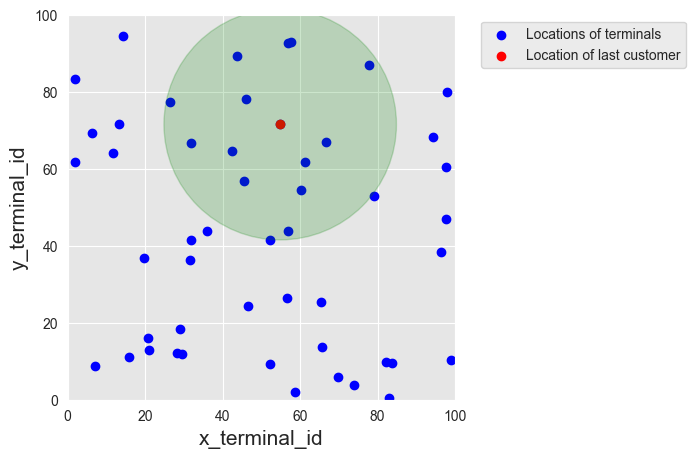

In [9]:
terminals_available_to_customer_fig

In [10]:
customers_df['available_terminals'] = customers_df.apply(lambda x: gen_terminal_within_radious(x,x_y_terminals,50), axis = 1)
customers_df

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_tx_num_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,3.269299,"[0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, ..."
1,1,42.365480,64.589411,46.570785,23.285393,5.350638,"[0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 15, 1..."
2,2,96.366276,38.344152,80.213879,40.106939,3.173370,"[1, 4, 5, 10, 14, 18, 19, 21, 22, 25, 26, 28, ..."
3,3,56.804456,92.559664,11.748426,5.874213,0.522776,"[0, 1, 2, 3, 5, 6, 9, 10, 11, 13, 15, 16, 18, ..."
4,4,2.021840,83.261985,78.924891,39.462446,5.220073,"[2, 3, 8, 11, 12, 13, 15, 17, 32, 41, 45, 46]"
...,...,...,...,...,...,...,...
95,95,85.772264,45.722345,95.428075,47.714038,3.454507,"[0, 1, 2, 4, 5, 9, 10, 14, 16, 18, 19, 20, 21,..."
96,96,82.076712,90.884372,82.474763,41.237381,0.956487,"[0, 1, 2, 3, 5, 6, 9, 10, 11, 16, 18, 19, 22, ..."
97,97,62.889844,39.843426,10.957730,5.478865,2.544194,"[0, 1, 2, 4, 5, 9, 11, 14, 16, 18, 19, 20, 21,..."
98,98,25.868407,84.903831,8.163940,4.081970,5.753896,"[0, 1, 2, 3, 6, 8, 11, 12, 13, 15, 16, 17, 18,..."


#### Generate Transaction Table

In [11]:
def gen_transactions(customers_df, start_date = "2024-10-01", nb_days = 10):
    transactions = []
    random.seed(int(customers_df.customer_id))
    np.random.seed(int(customers_df.customer_id))

    for day in range(nb_days):
        nb_tx = np.random.poisson(customers_df.mean_tx_num_per_day)
        if nb_tx > 0:
            for tx in range(nb_tx):
                tx_time = int(np.random.normal(86400/2, 20000))
                if (tx_time > 0) and (tx_time < 86400):
                    amount = np.random.normal(customers_df.mean_amount, customers_df.std_amount)
                    if amount < 0:
                        amount = np.random.uniform(0,customers_df.mean_amount*2)
                    amount = np.round(amount, decimals = 2)
                    if len(customers_df.available_terminals) > 0:
                        terminal_id = random.choice(customers_df.available_terminals)
                        transactions.append([tx_time + day*86400, day, customers_df.customer_id, terminal_id, amount])
        transactions_df = pd.DataFrame(transactions, columns = ['tx_time','tx_day','customer_id', 'terminal_id', 'amount'])
        if len(transactions_df) > 0:
            transactions_df['tx_datetime'] = pd.to_datetime(transactions_df['tx_time'], unit='s', origin=start_date)
            transactions_df = transactions_df[['tx_datetime','customer_id', 'terminal_id', 'amount', 'tx_time','tx_day']]
    return transactions_df

In [12]:
transactions_df = gen_transactions(customers_df.iloc[4], start_date = '2024-10-01', nb_days = 10)
transactions_df.head(5)

,tx_datetime,customer_id,terminal_id,amount,tx_time,tx_day
0,2024-10-01 09:40:33,4,11,16.39,34833,0
1,2024-10-01 08:24:05,4,12,102.55,30245,0
2,2024-10-01 13:50:45,4,3,33.64,49845,0
3,2024-10-01 15:26:13,4,46,75.45,55573,0
4,2024-10-01 14:21:41,4,15,92.04,51701,0


#### Scale up to larger DataSets and Export

In [15]:
def generate_dataset(n_customers, n_terminals, nb_days, start_date, r):
    start_time = time.time()
    customers_df = gen_customer_profile(n_customers, 0)
    print("Time to generate customer profile {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    terminals_df = gen_terminal_profile(n_terminals, 0)
    print("Time to generate terminal profile {0:.2}s".format(time.time()-start_time))
    
    start_time = time.time()
    x_y_terminals = terminals_df[['x_terminal_id','y_terminal_id']].values.astype(float)
    customers_df['available_terminals'] = customers_df.apply(lambda x: gen_terminal_within_radious(x, x_y_terminals, r), axis = 1)
    customers_df['nb_terminals'] = customers_df.available_terminals.apply(len)
    print("Time to generate associate terminal to customer {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    transactions_df = customers_df.groupby('customer_id').apply(lambda x: gen_transactions(x.iloc[0], start_date, nb_days=nb_days)).reset_index(drop = True)
    print("Time to generate transactions: {0:.2f}s".format(time.time() - start_time))

    # Sort transactions chronologically
    transactions_df = transactions_df.sort_values('tx_datetime').reset_index(drop=True)
    
    # Add transaction_id as the index
    transactions_df.reset_index(inplace=True)
    transactions_df.rename(columns={'index': 'transaction_id'}, inplace=True)
    
    return customers_df, terminals_df, transactions_df


In [17]:
(customers_df, terminals_df, transactions_df)=\
    generate_dataset(n_customers = 50, 
                     n_terminals = 100, 
                     nb_days=14, 
                     start_date="2024-10-01", 
                     r=5)

Time to generate customer profile 0.0s
Time to generate terminal profile 0.0s
Time to generate associate terminal to customer 0.015s
Time to generate transactions: 2.17s


C:\Users\thanh\AppData\Local\Temp\ipykernel_16548\2851151579.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions_df = customers_df.groupby('customer_id').apply(lambda x: gen_transactions(x.iloc[0], start_date, nb_days=nb_days)).reset_index(drop = True)


In [18]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,amount,tx_time,tx_day
0,0,2024-10-01 00:07:56,2,4,146.00,476,0
1,1,2024-10-01 00:35:35,25,28,107.35,2135,0
2,2,2024-10-01 00:51:53,14,64,52.87,3113,0
3,3,2024-10-01 01:11:00,8,16,2.08,4260,0
4,4,2024-10-01 01:31:24,5,10,53.01,5484,0
...,...,...,...,...,...,...,...
1888,1888,2024-10-14 22:16:09,36,72,16.10,1203369,13
1889,1889,2024-10-14 22:43:13,30,97,192.98,1204993,13
1890,1890,2024-10-14 23:00:25,25,56,50.52,1206025,13
1891,1891,2024-10-14 23:13:22,6,12,31.21,1206802,13


In [19]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.tx_day<10]['amount'].values
time_val = transactions_df[transactions_df.tx_day<10]['tx_time'].values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "amount", ylabel="number of transactions")

# we divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "time (days)", ylabel="number of transactions")

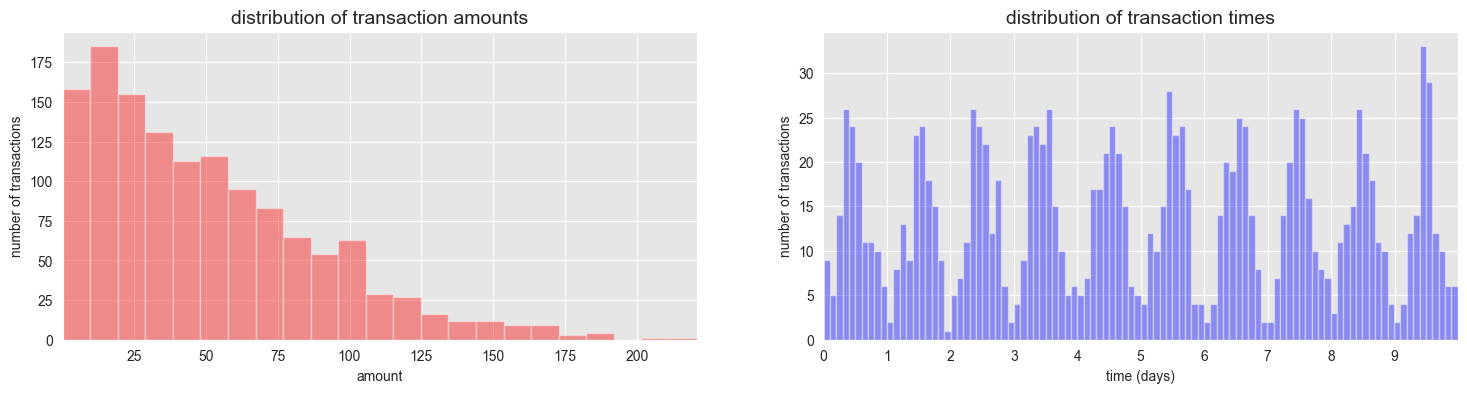

In [20]:
distribution_amount_times_fig

#### 5. Fraud Scenarios generation

**Scenario 1**: Transactions have amount greater than 220.

**Scenario 2**: Everyday draw a list of two terminals at random, all transactions on these terminals in the next 28 days will be marked as fraudulent.

**Scenario 3**: Every day, a list of 3 customers is drawn at random. In the next 14 days, 1/3 of their transactions have their amounts multiplied by 5 and marked as fraudulent.

In [21]:
def add_fraud(customers_df, terminals_df, transactions_df):
    transactions_df['tx_fraud'] = 0
    transactions_df['tx_fraud_scenario'] = 0

    transactions_df.loc[transactions_df['amount'] > 220, 'tx_fraud'] = 1
    transactions_df.loc[transactions_df['amount'] > 220, 'tx_fraud_scenario'] = 1
    number_of_first_scenario = transactions_df.tx_fraud.sum()
    print('Number of frauds from sc1: ' + str(number_of_first_scenario))

    for day in range(transactions_df.tx_day.max()):
        compromised_terminals  = terminals_df.terminal_id.sample(n = 2, random_state = day)
        compromised_transactions = transactions_df[(transactions_df.tx_day > day) &
                                                    (transactions_df.tx_day < day + 28) &
                                                    (transactions_df.isin(compromised_terminals))]
        transactions_df.loc[compromised_transactions.index, 'tx_fraud'] = 1
        transactions_df.loc[compromised_transactions.index, 'tx_fraud_scenario'] = 2
    number_of_second_scenario = transactions_df.tx_fraud.sum() - number_of_first_scenario
    print('Number of frauds from sc2: ' + str(number_of_second_scenario))

    for day in range(transactions_df.tx_day.max()):
        compromised_customers = customers_df.customer_id.sample(n = 3, random_state = day)
        compromised_transactions = transactions_df[(transactions_df.tx_day > day)&
                                                    (transactions_df.tx_day < day + 14)&
                                                    (transactions_df.customer_id.isin(compromised_customers))]
        nb_compromised_transactions=len(compromised_transactions)
        random.seed(day)
        index_frauds = random.sample(list(compromised_transactions.index.values), k = int(nb_compromised_transactions/3))
        transactions_df.loc[index_frauds, 'amount'] = transactions_df.loc[index_frauds, 'amount']*5
        transactions_df.loc[index_frauds, 'tx_fraud_scenario'] = 3
        transactions_df.loc[index_frauds, 'tx_fraud'] = 1
    number_of_third_scenario=transactions_df.tx_fraud.sum()-number_of_second_scenario-number_of_first_scenario
    print("Number of frauds from scenario 3: "+str(number_of_third_scenario))
    
    return transactions_df     

In [22]:
datasets = add_fraud(customers_df, terminals_df, transactions_df)
datasets

Number of frauds from sc1: 1
Number of frauds from sc2: 1892
Number of frauds from scenario 3: 0


,transaction_id,tx_datetime,customer_id,terminal_id,amount,tx_time,tx_day,tx_fraud,tx_fraud_scenario
0,0,2024-10-01 00:07:56,2,4,146.00,476,0,1,2
1,1,2024-10-01 00:35:35,25,28,107.35,2135,0,1,2
2,2,2024-10-01 00:51:53,14,64,52.87,3113,0,1,2
3,3,2024-10-01 01:11:00,8,16,2.08,4260,0,1,2
4,4,2024-10-01 01:31:24,5,10,53.01,5484,0,1,2
...,...,...,...,...,...,...,...,...,...
1888,1888,2024-10-14 22:16:09,36,72,80.50,1203369,13,1,3
1889,1889,2024-10-14 22:43:13,30,97,192.98,1204993,13,1,2
1890,1890,2024-10-14 23:00:25,25,56,50.52,1206025,13,1,2
1891,1891,2024-10-14 23:13:22,6,12,31.21,1206802,13,1,2


In [23]:
# Visualize
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['tx_day'])['customer_id'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['tx_day'])['tx_fraud'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['tx_fraud']>0].groupby(['tx_day']).customer_id.nunique()
    
    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [24]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="tx_day", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

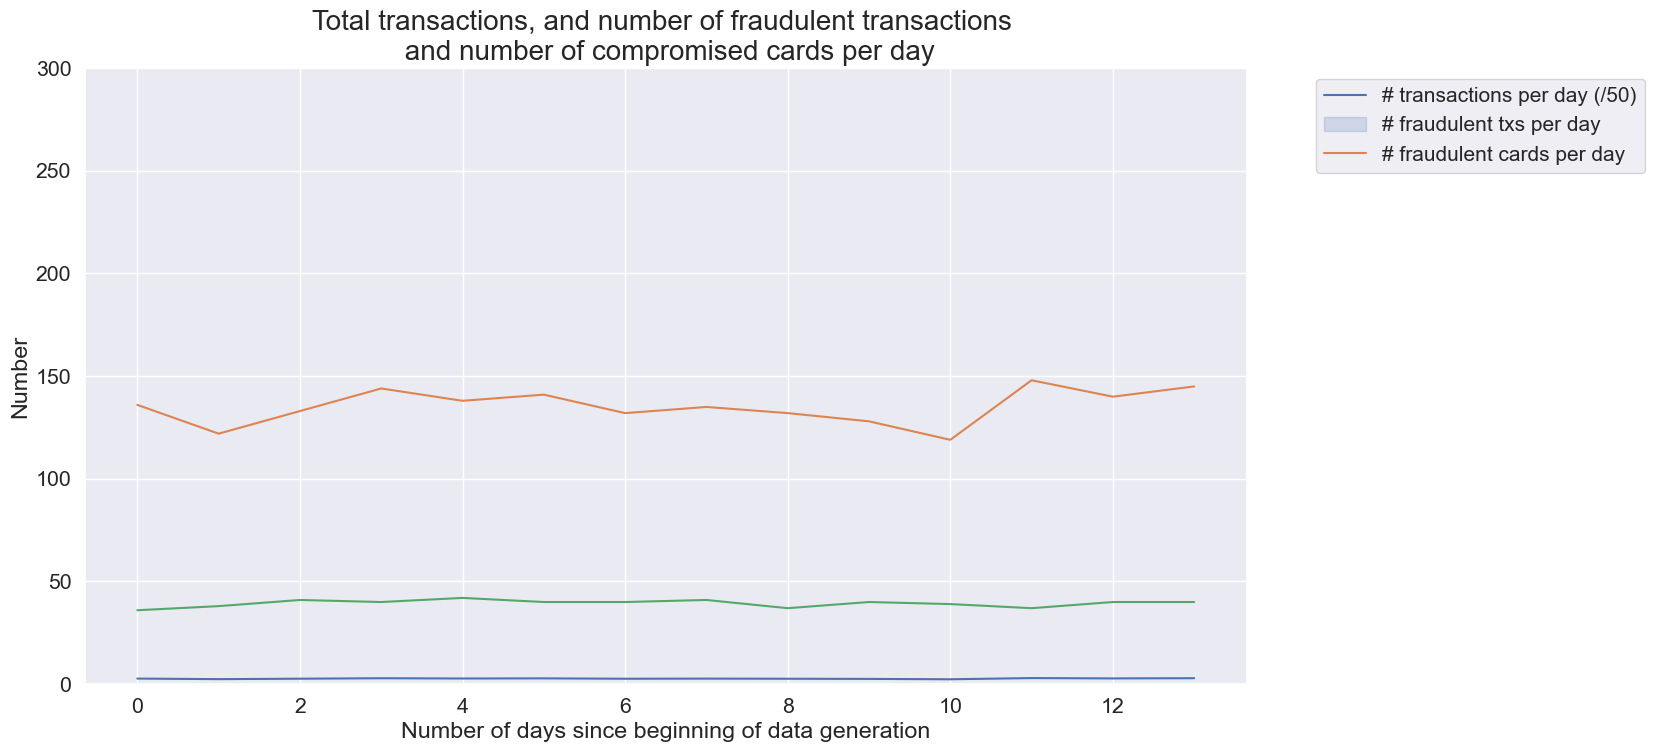

In [25]:
fraud_and_transactions_stats_fig

#### Export Data

In [27]:
start_time = time.time()
file_name = "Credit-Card-Transaction.csv"
transactions_df.to_csv(file_name)
print("Time to export file {} is: ".format(file_name) + str(np.round(time.time()- start_time, decimals = 3)))

Time to export file Credit-Card-Transaction.csv is: 0.018
